In [15]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from process_movella import load_movella, get_position
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FFMpegWriter

In [2]:
IN_DIR = Path("uploads/2025-07-22 Euler Angles")
OUT_DIR = Path("out")

# make the output directory if it does not exit
if not OUT_DIR.exists():
    OUT_DIR.mkdir()

In [3]:
# Constants

# Hoop specifications
d = 83./100     # m, hoop diameter
r = d/2         # m, hoop radius
m = 0.25        # kg, mass of hoop

# Gravity
g = 9.81        # m/s^2, gravitational acceleration

# Time setup
f = 120         # Hz, sampling frequency
dt = 1 / f      # s, sample duration

# Inertias in corotational basis
Ixx = 0.5*m*r**2
Iyy = 0.5*m*r**2
Izz = m*r**2

In [24]:
# Reading sensor data

# OL: left side of hoop
# OR: right side of hoop
# IT: on hip, above hoop (on right side of waist belt)
# IL: on hip, above hoop (on left side of waist belt)
# IB: on hip, below hoop (in right pocket)
OL_hoop_file = sorted(list(IN_DIR.glob("OL_*.csv")))[0]
OR_hoop_file = sorted(list(IN_DIR.glob("OR_*.csv")))[0]
IT_hoop_file = sorted(list(IN_DIR.glob("IT_*.csv")))[0]
IL_hoop_file = sorted(list(IN_DIR.glob("IL_*.csv")))[0]
IB_hoop_file = sorted(list(IN_DIR.glob("IB_*.csv")))[0]

lead_time_val = 0

OL_hoop_data = load_movella(OL_hoop_file, lead_time=lead_time_val)
OR_hoop_data = load_movella(OR_hoop_file, lead_time=lead_time_val)
IT_hoop_data = load_movella(IT_hoop_file, lead_time=lead_time_val)
IL_hoop_data = load_movella(IL_hoop_file, lead_time=lead_time_val)
IB_hoop_data = load_movella(IB_hoop_file, lead_time=lead_time_val)

time, OL_accel_x, OL_accel_y, OL_accel_z, OL_phi, OL_theta, OL_psi, OL_wx, OL_wy, OL_wz = OL_hoop_data.T
_, OR_accel_x, OR_accel_y, OR_accel_z, OR_phi, OR_theta, OR_psi, OR_wx, OR_wy, OR_wz = OR_hoop_data.T
_, IT_accel_x, IT_accel_y, IT_accel_z, IT_phi, IT_theta, IT_psi, IT_wx, IT_wy, IT_wz = IT_hoop_data.T
_, IL_accel_x, IL_accel_y, IL_accel_z, IL_phi, IL_theta, IL_psi, IL_wx, IL_wy, IL_wz = IL_hoop_data.T
_, IB_accel_x, IB_accel_y, IB_accel_z, IB_phi, IB_theta, IB_psi, IB_wx, IB_wy, IB_wz = IB_hoop_data.T

# time step
dt = time[1]-time[0]

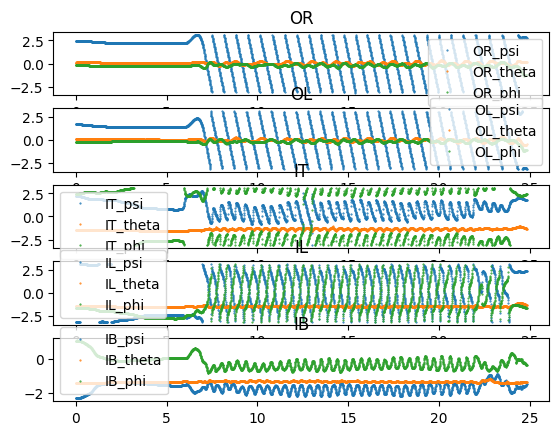

In [25]:
# Plotting raw euler angle data
# re: raw euler
fig_re, ax_re = plt.subplots(5)  # Creates a 3x1 grid of Axes

ax_re[0].set_title('OR')
ax_re[0].plot(time, OR_psi,'.', label='OR_psi', markersize=1)
ax_re[0].plot(time, OR_theta,'.', label='OR_theta', markersize=1)
ax_re[0].plot(time, OR_phi,'.', label='OR_phi', markersize=1)
ax_re[0].legend()

ax_re[1].set_title('OL')
ax_re[1].plot(time, OL_psi,'.', label='OL_psi', markersize=1)
ax_re[1].plot(time, OL_theta,'.', label='OL_theta', markersize=1)
ax_re[1].plot(time, OL_phi,'.', label='OL_phi', markersize=1)
ax_re[1].legend()

ax_re[2].set_title('IT')
ax_re[2].plot(time, IT_psi,'.', label='IT_psi', markersize=1)
ax_re[2].plot(time, IT_theta,'.', label='IT_theta', markersize=1)
ax_re[2].plot(time, IT_phi,'.', label='IT_phi', markersize=1)
ax_re[2].legend()

ax_re[3].set_title('IL')
ax_re[3].plot(time, IL_psi,'.', label='IL_psi', markersize=1)
ax_re[3].plot(time, IL_theta,'.', label='IL_theta', markersize=1)
ax_re[3].plot(time, IL_phi,'.', label='IL_phi', markersize=1)
ax_re[3].legend()

ax_re[4].set_title('IB')
ax_re[4].plot(time, IB_psi,'.', label='IB_psi', markersize=1)
ax_re[4].plot(time, IB_theta,'.', label='IB_theta', markersize=1)
ax_re[4].plot(time, IB_phi,'.', label='IB_phi', markersize=1)
ax_re[4].legend()

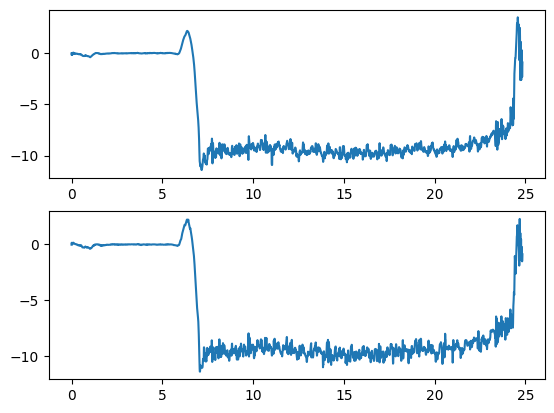

In [26]:
# Derivatives of psi

OL_psi_unwrapped = np.unwrap(OL_psi)
OR_psi_unwrapped = np.unwrap(OR_psi)

OL_dpsi_dt = np.gradient(OL_psi_unwrapped, dt)
OR_dpsi_dt = np.gradient(OR_psi_unwrapped, dt)

fig_dpsi, ax_psi = plt.subplots(2)
ax_psi[0].plot(time, OL_dpsi_dt)
ax_psi[1].plot(time, OR_dpsi_dt)

We can detect when steady hula hoop motion is happening by looking at the psi-dot time series. psi is almost constant during steady hula hooping.

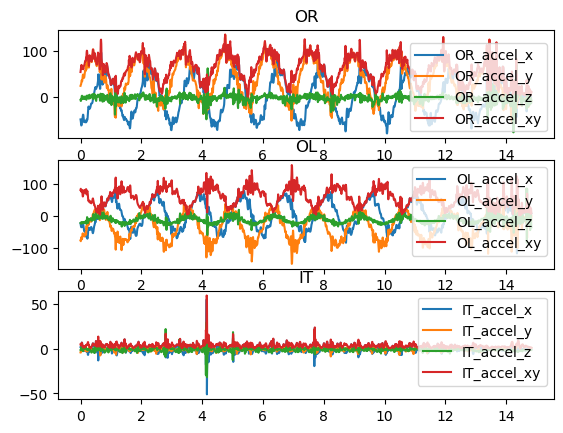

In [6]:
# Plotting raw acceleration data
# ra: raw accelerations
fig_ra, ax_ra = plt.subplots(3)  # Creates a 3x1 grid of Axes

ax_ra[0].set_title('OR')
ax_ra[0].plot(time, OR_accel_x, label='OR_accel_x')
ax_ra[0].plot(time, OR_accel_y, label='OR_accel_y')
ax_ra[0].plot(time, OR_accel_z, label='OR_accel_z')
OR_accel_xy = np.sqrt(OR_accel_x**2+OR_accel_y**2)
ax_ra[0].plot(time, OR_accel_xy, label='OR_accel_xy')
ax_ra[0].legend()

ax_ra[1].set_title('OL')
ax_ra[1].plot(time, OL_accel_x, label='OL_accel_x')
ax_ra[1].plot(time, OL_accel_y, label='OL_accel_y')
ax_ra[1].plot(time, OL_accel_z, label='OL_accel_z')
OL_accel_xy = np.sqrt(OL_accel_x**2+OL_accel_y**2)
ax_ra[1].plot(time, OL_accel_xy, label='OL_accel_xy')
ax_ra[1].legend()

ax_ra[2].set_title('IT')
ax_ra[2].plot(time, IT_accel_x, label='IT_accel_x')
ax_ra[2].plot(time, IT_accel_y, label='IT_accel_y')
ax_ra[2].plot(time, IT_accel_z, label='IT_accel_z')
IT_accel_xy = np.sqrt(IT_accel_x**2+IT_accel_y**2)
ax_ra[2].plot(time, IT_accel_xy, label='IT_accel_xy')
ax_ra[2].legend()

At the minimum value of az, that's the point when the sensor is being pushed up. Both sensors should read the same signal, but shifted. The shift can be adjusted by aligning the local minimza of az.

In [7]:
# Fixed basis
E1 = np.array([1,0,0])
E2 = np.array([0,1,0])
E3 = np.array([0,0,1])

def get_fixed_frame_acceleration(ax, ay, az, psi,theta,phi):

    n = np.size(psi)

    e1p = np.zeros((3,n))
    e2p = np.zeros((3,n))
    e3p = np.zeros((3,n))

    e1pp = np.zeros((3,n))
    e2pp = np.zeros((3,n))
    e3pp = np.zeros((3,n))

    e1 = np.zeros((3,n))
    e2 = np.zeros((3,n))
    e3 = np.zeros((3,n))

    a = np.zeros((3,n))

    for i in range(n):
        # First rotation by an angle psi about E3
        e1p[:,i] = np.cos(psi[i])*E1+np.sin(psi[i])*E2
        e2p[:,i] = -np.sin(psi[i])*E1+np.cos(psi[i])*E2
        e3p[:,i] = E3
        # Second rotation by an angle theta about e2p
        e1pp[:,i] = np.cos(theta[i])*e1p[:,i]-np.sin(theta[i])*e3p[:,i]
        e2pp[:,i] = e2p[:,i]
        e3pp[:,i] = np.sin(theta[i])*e1p[:,i]+np.cos(theta[i])*e3p[:,i]
        # Third rotation by an angle phi about e1pp
        e1[:,i] = e1pp[:,i]
        e2[:,i] = np.cos(phi[i])*e2pp[:,i]+np.sin(phi[i])*e3pp[:,i]
        e3[:,i] = -np.sin(phi[i])*e2pp[:,i]+np.cos(phi[i])*e3pp[:,i]
        # acceleration in fixed frame
        a[:,i] = ax[i]*e1[:,i]+ay[i]*e2[:,i]+az[i]*e3[:,i]
    # a = A1*E1+A2*E2+A3*E3
    Ax = a[0,:]
    Ay = a[1,:]
    Az = a[2,:]

    return Ax, Ay, Az

OR_Ax, OR_Ay, OR_Az = get_fixed_frame_acceleration(OR_accel_x, OR_accel_y, OR_accel_z, OR_psi, OR_theta, OR_phi)
OL_Ax, OL_Ay, OL_Az = get_fixed_frame_acceleration(OL_accel_x, OL_accel_y, OL_accel_z, OL_psi, OL_theta, OL_phi)
IT_Ax, IT_Ay, IT_Az = get_fixed_frame_acceleration(IT_accel_x, IT_accel_y, IT_accel_z, IT_psi, IT_theta, IT_phi)


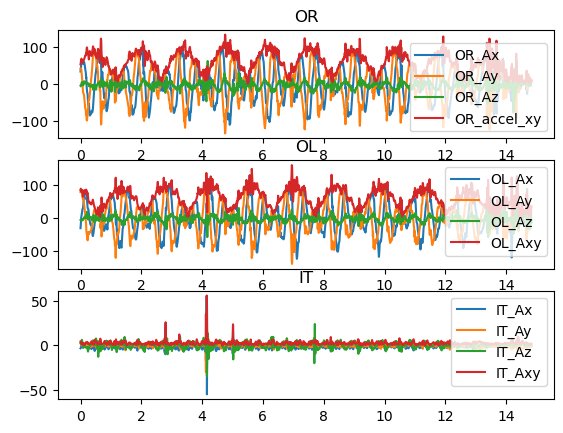

In [8]:
# Plotting raw acceleration data in fixed basis
# ra: raw acceleriations
fig_ra, ax_ra = plt.subplots(3)  # Creates a 3x1 grid of Axes

ax_ra[0].set_title('OR')
ax_ra[0].plot(time, OR_Ax, label='OR_Ax')
ax_ra[0].plot(time, OR_Ay, label='OR_Ay')
ax_ra[0].plot(time, OR_Az, label='OR_Az')
OR_accel_xy = np.sqrt(OR_accel_x**2+OR_accel_y**2)
ax_ra[0].plot(time, OR_accel_xy, label='OR_accel_xy')
ax_ra[0].legend()

ax_ra[1].set_title('OL')
ax_ra[1].plot(time, OL_Ax, label='OL_Ax')
ax_ra[1].plot(time, OL_Ay, label='OL_Ay')
ax_ra[1].plot(time, OL_Az, label='OL_Az')
OL_Axy = np.sqrt(OL_Ax**2+OL_Ay**2)
ax_ra[1].plot(time, OL_Axy, label='OL_Axy')
ax_ra[1].legend()

ax_ra[2].set_title('IT')
ax_ra[2].plot(time, IT_Ax, label='IT_Ax')
ax_ra[2].plot(time, IT_Ay, label='IT_Ay')
ax_ra[2].plot(time, IT_Az, label='IT_Az')
IT_Axy = np.sqrt(IT_Ax**2+IT_Ay**2)
ax_ra[2].plot(time, IT_Axy, label='IT_Axy')
ax_ra[2].legend()

In [9]:
OR_dx, OR_dy, OR_dz, OR_vx, OR_vy, OR_vz = get_position(time,OR_Ax, OR_Ay, OR_Az)
OL_dx, OL_dy, OL_dz, OL_vx, OL_vy, OL_vz = get_position(time,OL_Ax, OL_Ay, OL_Az)
IT_dx, IT_dy, IT_dz, IT_vx, IT_vy, IT_vz = get_position(time,IT_Ax, IT_Ay, IT_Az)

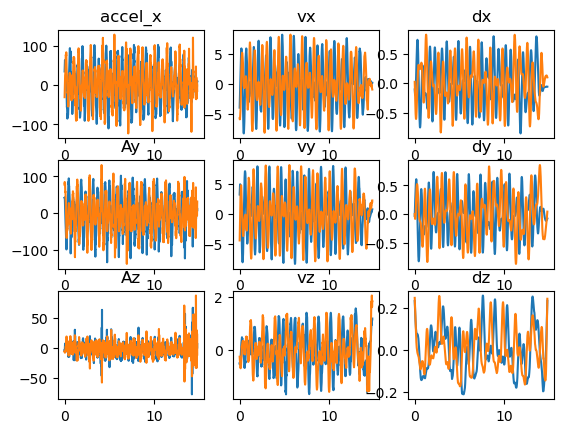

In [10]:
# Plot positions of two points on hoop
fig, ax = plt.subplots(3, 3)  # Creates a 3x1 grid of Axes

# acceleration subplots
ax[0, 0].set_title('accel_x')
ax[0, 0].plot(time, OR_Ax, label='OR_Ax')#, color='blue')
ax[0, 0].plot(time, OL_Ax, label='OL_Ax')#, color='orange')
# ax[0, 0].legend()

ax[1, 0].set_title('Ay')
ax[1, 0].plot(time, OR_Ay)
ax[1, 0].plot(time, OL_Ay)

ax[2, 0].set_title('Az')
ax[2, 0].plot(time, OR_Az)
ax[2, 0].plot(time, OL_Az)

# velocity subplots
ax[0, 1].set_title('vx')
ax[0, 1].plot(time[1:], OR_vx)
ax[0, 1].plot(time[1:], OL_vx)

ax[1, 1].set_title('vy')
ax[1, 1].plot(time[1:], OR_vy)
ax[1, 1].plot(time[1:], OL_vy)

ax[2, 1].set_title('vz')
ax[2, 1].plot(time[1:], OR_vz)
ax[2, 1].plot(time[1:], OL_vz)

# displacement subplots
ax[0, 2].set_title('dx')
ax[0, 2].plot(time[2:], OR_dx)
ax[0, 2].plot(time[2:], OL_dx)

ax[1, 2].set_title('dy')
ax[1, 2].plot(time[2:], OR_dy)
ax[1, 2].plot(time[2:], OL_dy)

ax[2, 2].set_title('dz')
ax[2, 2].plot(time[2:], OR_dz)
ax[2, 2].plot(time[2:], OL_dz)

Text(0.5, 0.92, 'Hoop Sensor Displacement')

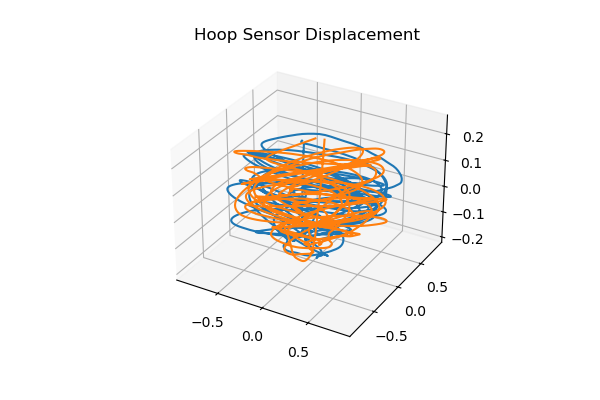

In [11]:
# 3D plot of hoop sensor displacement path
%matplotlib widget
fig_hooppath = plt.figure(figsize=(6,4))
ax = fig_hooppath.add_subplot(projection='3d')
ax.plot(OR_dx,OR_dy,OR_dz)
ax.plot(OL_dx,OL_dy,OL_dz)
ax.set_title('Hoop Sensor Displacement')

Text(0.5, 0.92, 'Hip Sensor Displacement')

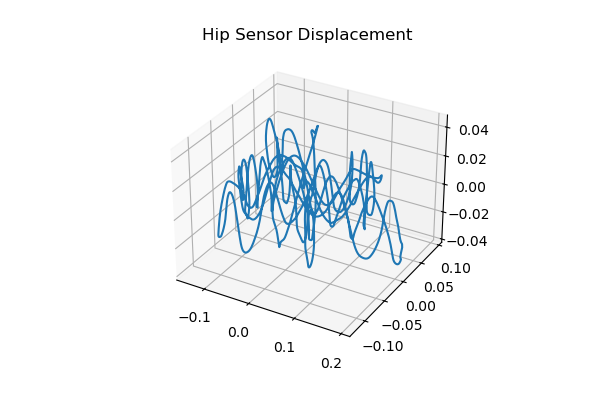

In [12]:
# 3D plot of hip sensor displacement path

fig_hippath = plt.figure(figsize=(6,4))
ax = fig_hippath.add_subplot(projection='3d')
ax.plot(IT_dx,IT_dy,IT_dz)
ax.set_title('Hip Sensor Displacement')

Text(0.5, 0.92, 'All Sensor Displacement Paths')

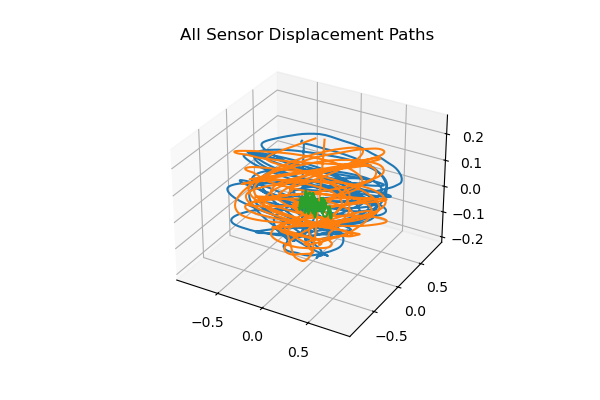

In [13]:
# On same plot

# 3D plot of all sensor displacement paths

fig_paths = plt.figure(figsize=(6,4))
ax = fig_paths.add_subplot(projection='3d')
ax.plot(OR_dx,OR_dy,OR_dz, label='OR_sensor')
ax.plot(OL_dx,OL_dy,OL_dz, label='OR_sensor')
ax.plot(IT_dx,IT_dy,IT_dz, label='IT_sensor')
ax.set_title('All Sensor Displacement Paths')


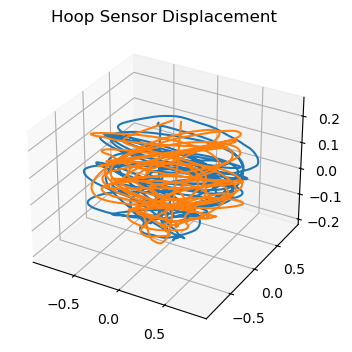

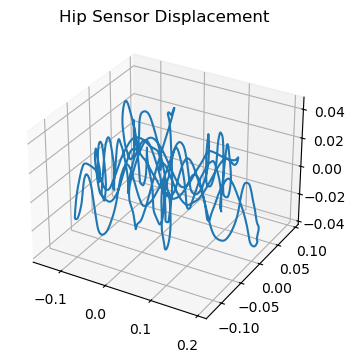

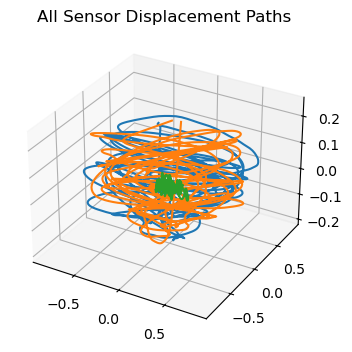

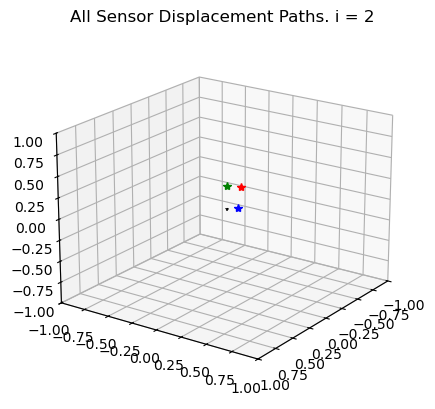

In [14]:
# Animation of sensor location in time
%matplotlib inline
# Set up figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20, azim=35)
ax.set_box_aspect([4, 4, 3])  # Adjust for box on

# Fixed basis vectors
ax.quiver(0, 0, 0, 0.01, 0, 0, linewidth=2, color='k')
ax.quiver(0, 0, 0, 0, 0.01, 0, linewidth=2, color='k')
ax.quiver(0, 0, 0, 0, 0, 0.01, linewidth=2, color='k')

ntime = np.size(OR_dx)

# Prepare video writer
writer = FFMpegWriter(fps=round(1/dt)//3)
with writer.saving(fig, "sensor_locations.mp4", dpi=200):

    max_range = 1
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])
    ax.set_zlim([-max_range, max_range])

    for i in range(2,ntime):

        ax.set_title(f"All Sensor Displacement Paths. i = {i}")

        marker_OR, = ax.plot(OR_dx[i], OR_dy[i], OR_dz[i],
                          marker='*', color='r', linewidth=2)
        marker_OL, = ax.plot(OL_dx[i], OL_dy[i], OL_dz[i],
                          marker='*', color='g', linewidth=2)
        marker_IT, = ax.plot(IT_dx[i], IT_dy[i], IT_dz[i],
                          marker='*', color='b', linewidth=2)

        plt.pause(0.001)
        writer.grab_frame()

        # Remove current frame's artists
        for artist in [marker_OR, marker_OL, marker_IT]:
            artist.remove()

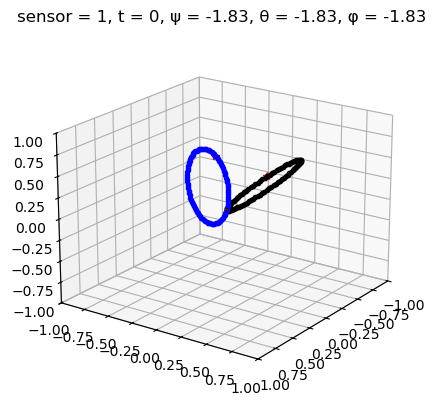

In [ ]:
# Plotting hoop seperately from two sensor data on same plot
colors = ['k','b']

# Set up figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20, azim=35)
ax.set_box_aspect([4, 4, 3])  # Adjust for box on

max_range = 1
ax.set_xlim([-max_range, max_range])
ax.set_ylim([-max_range, max_range])
ax.set_zlim([-max_range, max_range])

# Fixed basis vectors
ax.quiver(0, 0, 0, 0.01, 0, 0, linewidth=2, color='k')
ax.quiver(0, 0, 0, 0, 0.01, 0, linewidth=2, color='k')
ax.quiver(0, 0, 0, 0, 0, 0.01, linewidth=2, color='k')

delta = np.linspace(0, 2 * np.pi, 100)
xC = np.zeros(3)  # center of hoop

psi = np.vstack((OL_psi, OR_psi)) 
theta = np.vstack((OL_theta, OR_theta)) 
phi = np.vstack((OL_phi, OR_phi)) 

wx = np.vstack((OL_wx, OR_wx)) 
wy = np.vstack((OL_wy, OR_wy)) 
wz = np.vstack((OL_wz, OR_wz)) 

OR_dx_padded = np.concatenate(([0, 0], OR_dx))
OR_dy_padded = np.concatenate(([0, 0], OR_dy))
OR_dz_padded = np.concatenate(([0, 0], OR_dz))
        
OR_vx_padded = np.concatenate(([0], OR_vx))
OR_vy_padded = np.concatenate(([0], OR_vy))
OR_vz_padded = np.concatenate(([0], OR_vz))

OL_dx_padded = np.concatenate(([0, 0], OL_dx))
OL_dy_padded = np.concatenate(([0, 0], OL_dy))
OL_dz_padded = np.concatenate(([0, 0], OL_dz))
        
OL_vx_padded = np.concatenate(([0], OL_vx))
OL_vy_padded = np.concatenate(([0], OL_vy))
OL_vz_padded = np.concatenate(([0], OL_vz))

dx = np.vstack((OR_dx_padded, OL_dx_padded)) 
dy = np.vstack((OR_dy_padded, OL_dy_padded)) 
dz = np.vstack((OR_dz_padded, OL_dz_padded)) 

vx = np.vstack((OR_vx_padded, OL_vx_padded)) 
vy = np.vstack((OR_vy_padded, OL_vy_padded)) 
vz = np.vstack((OR_vz_padded, OL_vz_padded)) 

nsensor = np.shape(psi)[0]
ntime = np.shape(psi)[1]

KE_hoop = np.zeros((nsensor,ntime))
PE_hoop = np.zeros((nsensor,ntime))

exp = np.zeros((3,nsensor,ntime))
eyp = np.zeros((3,nsensor,ntime))
ezp = np.zeros((3,nsensor,ntime))

expp = np.zeros((3,nsensor,ntime))
eypp = np.zeros((3,nsensor,ntime))
ezpp = np.zeros((3,nsensor,ntime))

ex = np.zeros((3,nsensor,ntime))
ey = np.zeros((3,nsensor,ntime))
ez = np.zeros((3,nsensor,ntime))

omega_hoop = np.zeros((3,nsensor,ntime))
vC = np.zeros((3,nsensor,ntime))

mark = [None] * nsensor
hoop = [None] * nsensor

# Prepare video writer
writer = FFMpegWriter(fps=round(1/dt)//3)
with writer.saving(fig, "hula_hoop_two_sensors.mp4", dpi=200):

    for t in range(ntime):

        for s in range(nsensor):
            # s == 0, sensor OR
            # s == 1, sensor OL

            # First rotation by an angle psi about E3
            exp[:,s,t] = np.cos(psi[s,t])*E1+np.sin(psi[s,t])*E2
            eyp[:,s,t] = -np.sin(psi[s,t])*E1+np.cos(psi[s,t])*E2
            ezp[:,s,t] = E3
            # Second rotation by an angle theta about e2p
            expp[:,s,t] = np.cos(theta[s,t])*exp[:,s,t]-np.sin(theta[s,t])*ezp[:,s,t]
            eypp[:,s,t] = eyp[:,s,t]
            ezpp[:,s,t] = np.sin(theta[s,t])*exp[:,s,t]+np.cos(theta[s,t])*ezp[:,s,t]
            # Third rotation by an angle phi about e1pp
            ex[:,s,t] = expp[:,s,t]
            ey[:,s,t] = np.cos(phi[s,t])*eypp[:,s,t]+np.sin(phi[s,t])*ezpp[:,s,t]
            ez[:,s,t] = -np.sin(phi[s,t])*eypp[:,s,t]+np.cos(phi[s,t])*ezpp[:,s,t]

            omega_hoop[:,s,t] = wx[s,t]*ex[:,s,t]+wy[s,t]*ey[:,s,t]+wz[s,t]*ez[:,s,t]

            vC[:,s,t] = np.array([vx[s,t],vy[s,t],vz[s,t]])+np.cross(omega_hoop[:,s,t],r*ey[:,s,t])

            KE_hoop[s,t] = 0.5*(Ixx*wx[s,t]**2+Iyy*wy[s,t]**2+Izz*wz[s,t]**2)+0.5*nsensor*np.linalg.norm(vC[:,s,t])**2
            PE_hoop[s,t] = nsensor*g*dz[s,t]

            ax.set_title(f"sensor = {s}, t = {t}, ψ = {psi[s,t]:.2f}, θ = {theta[s,t]:.2f}, φ = {phi[s,t]:.2f}")

            # Blue vectors
            e1p_plot = ax.quiver(0, 0, 0, *0.01*exp[:,s,t], linewidth=1, color='b')
            e2p_plot = ax.quiver(0, 0, 0, *0.01*eyp[:,s,t], linewidth=1, color='b')
            e3p_plot = ax.quiver(0, 0, 0, *0.01*ezp[:,s,t], linewidth=1, color='b')

            # Red vectors
            e1pp_plot = ax.quiver(0, 0, 0, *0.01*expp[:,s,t], linewidth=1, color='r')
            e2pp_plot = ax.quiver(0, 0, 0, *0.01*eypp[:,s,t], linewidth=1, color='r')
            e3pp_plot = ax.quiver(0, 0, 0, *0.01*ezpp[:,s,t], linewidth=1, color='r')

            # Green vectors
            e1_plot = ax.quiver(0, 0, 0, *0.01*ex[:,s,t], linewidth=1, color='g')
            e2_plot = ax.quiver(0, 0, 0, *0.01*ey[:,s,t], linewidth=1, color='g')
            e3_plot = ax.quiver(0, 0, 0, *0.01*ez[:,s,t], linewidth=1, color='g')


            # Circle
            xCircle = np.zeros((100, 3))
            xC = r*ey[:,s,t]+np.array([dx[s,t],dy[s,t],dz[s,t]])
            for j in range(100):
                xCircle[j, :] = xC + r * (np.cos(delta[j]) * ex[:,s,t] + np.sin(delta[j]) * ey[:,s,t])

            mark[s], = ax.plot([xCircle[0, 0]], [xCircle[0, 1]], [xCircle[0, 2]],
                            marker='*', color='r', linewidth=2)
            hoop[s], = ax.plot(xCircle[:, 0], xCircle[:, 1], xCircle[:, 2],
                            '.', color=colors[s], linewidth=2)

        plt.pause(0.001)
        writer.grab_frame()

        # Remove current frame's artists
        for s in range(nsensor):
            mark[s].remove()
            hoop[s].remove()
        for artist in [e1p_plot, e2p_plot, e3p_plot,
                    e1pp_plot, e2pp_plot, e3pp_plot,
                    e1_plot, e2_plot, e3_plot]:
            artist.remove()

# total energy of hoop
E_hoop = KE_hoop+PE_hoop


In [ ]:
# Comparing data from the two sensors

# Angular velocities
ax_w, fig_w = plt.subplots(3,1,figsize=(6, 8))
for s in range(nsensor):
    for i in range(3):
        ax_w[i].plot(omega_hoop[i,s,:],label=f'sensor {s}, w{i}') 

# Unit vector ez
ax_ez, fig_ez = plt.subplots(3,1,figsize=(6, 8))
for s in range(nsensor):
    for i in range(3):
        ax_ez[i].plot(ez[i,s,:],label=f'sensor {s}, w{i}') 

# Calculating the relative position vector between the two sensors
# https://chatgpt.com/share/687ff75c-b810-8011-bd51-12152ce2bfab

OL_vx, OL_vy, OL_vz
OR_vx, OR_vy, OR_vz

r_OL_wrt_OR = np.zeros((3,nsensor,ntime))

for t in range(ntime):
    temp1 = np.array([OL_vx[t], OL_vy[t], OL_vz[t]])-np.array([OR_vx[t], OR_vy[t], OR_vz[t]])
    for s in range(nsensor):
        temp2 = np.cross(omega_hoop[:,s,t],temp1)/(np.linalg.norm(temp1)**2)
        k = -np.dot(temp2,ez[:,s,t])/(np.dot(temp1,ez[:,s,t]))
        r_OL_wrt_OR[:,s,t] = temp2+k*temp1


In [ ]:
# Comparing data from the two sensors

# Magnitude of angular velocity vector
OR_omega_norm = OR_wx**2+OR_wy**2+OR_wz**2
OL_omega_norm = OL_wx**2+OL_wy**2+OL_wz**2
fig_wnorm, ax_wnorm = plt.subplots()
ax_wnorm.plot(OR_omega_norm)
ax_wnorm.plot(OL_omega_norm)

# Angular velocities
fig_w, ax_w = plt.subplots(3,1,figsize=(6, 8))
for s in range(nsensor):
    for i in range(3):
        ax_w[i].plot(omega_hoop[i,s,:],'.',label=f'sensor {s}, w{i}') 
        ax_w[i].legend()

# Unit vector ez
fig_ez, ax_ez = plt.subplots(3,1,figsize=(6, 8))
for s in range(nsensor):
    for i in range(3):
        ax_ez[i].plot(ez[i,s,:],'.',label=f'sensor {s}, w{i}') 

# Calculating the relative position vector between the two sensors
# https://chatgpt.com/share/687ff75c-b810-8011-bd51-12152ce2bfab

# OL_vx, OL_vy, OL_vz
# OR_vx, OR_vy, OR_vz

r_OL_wrt_OR = np.zeros((3,nsensor,ntime))

for t in range(ntime-1):
    temp1 = np.array([OL_vx[t], OL_vy[t], OL_vz[t]])-np.array([OR_vx[t], OR_vy[t], OR_vz[t]])
    for s in range(nsensor):
        temp2 = np.cross(omega_hoop[:,s,t],temp1)/(np.linalg.norm(temp1)**2)
        temp3 = np.dot(temp1,ez[:,s,t])
        if temp3 != 0:
            k = -np.dot(temp2,ez[:,s,t])/temp3
            r_OL_wrt_OR[:,s,t] = temp2+k*temp1


In [ ]:
# Plot Energies
fig_E, ax_E = plt.subplots()

# ax_E.plot(time, KE_hoop, label='KE-hoop')
ax_E.plot(time, PE_hoop, label='PE-hoop')
# ax_E.plot(time, E_hoop, label='E-hoop')
ax_E.legend()
